# STA 220: Midterm

### Worth 200 Points

Winter 2020

## Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Yuxiang

Last Name: Lin

Student ID: 917849914

## Instructions

Please print your answer notebook to pdf (make sure that it is not unnecessarily long due to long output) and submit as the homework solution with your zip file.

For readability you,

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement
- you may add multiple cells between exercise cells

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

## Trans-Atlantic Slave Trade

In this homework, we will uncover some of the numbers behind the Trans-atlantic slave trade (TAST), also known as the middle passage, that brought African slaves to the Americas.  The middle passage is reported to have forcibly migrated over 10 million Africans to the Americas over a roughly 3 century time span.  Many aspects of the TAST is little known by most people, such as the countries that constituted this network of slave ships, the regions from which the slaves were taken, and the number of slaves captured from Africa.

This last number is especially important since the number of slaves taken from Africa can impact other estimates that result from this.  For example, when estimating the population of Africa in a given decade, demographers will use population growth models and more recent census data.  For example, there are roughly X number of people in Africa and such populations tend to grow at rate M.  Then if we want to calculate the population one century ahead then we just apply a simple formula that assumes that the population grows at this rate.  But if the population is being drained by the slave trade, then this number will tend to be underestimated because the growth rate is overestimated.  To account for this models need to take into account this drain on the population.

Throughout this homework you will need to follow the principles of graphical excellence and the grammar of graphics.  **Use only Plotnine for your graphics**, do not use Pyplot, Seaborn, or Plotly since they do not follow closely the grammar of graphics.  Be sure to include titles and necessary contextual captions.

**Warning:** The Trans-Atlantic Slave Trade remains one of the most horrific abuses of human rights in history.  This homework deals with the numbers behind this forced migration, please be aware that this is a sensitive topic for possibly yourself and others.   A suitable amount of respect and seriousness is required when dealing with this data.

**Exercise 1.** The data.

1. Read in the Trans-Atlantic Slave Trade database with Pandas.  Hint: if you use the unix tool `file` you can find that this CSV is encoded with iso-8859-1 character set.  Make sure that all missing values are encoded as NaN.
2. Open up the pdf file: TAST_codebook.pdf which is the data dictionary for this and other related datasets.  Many of the variables in the codebook are not in this dataset because it is describing an updated dataset. Create a list where you describe the meaning of the columns of your imported dataframe.  You can group similar columns together when describing their rough meaning, such as ownera,...,ownerp are owners of the slave ships.

Throughout we will disregard all time variables other than year since they are unreliable.

In [1]:
import pandas as pd
import numpy as np
import plotnine as p9
import re

In [2]:
# Task 1: read in TAST data and encode all missing values as NaN
TAST = pd.read_csv('/Users/shayne/Desktop/STA 220/220_midterm/tastdb-2010.csv', encoding='latin-1')
TAST = TAST.replace(' ', np.nan)

In [3]:
# Task 2: create list for describing variable meanings
variable = ['voyageid: Voyage identification', 'evgreen: Voyage in 1999 CD-ROM', 'shipname: Name of vessel',
            'national: Country in which ship registered', 'natinimp: Imputed country in which ship registered',
            'placcons: Place where vessel constructed', 'yrcons: Year of vessel’s construction', 
            'placreg: Year of vessel’s registration', 'yrreg: Year of vessel’s registration', 
            'rig: Rig of vessel', 'tonnage, tonmod: Tonnage of vessel', 'guns: Guns mounted',
            'ownera, ownerb, ownerc, ownerd, ownere, ownerf, ownerg, ownerh, owneri, ownerj, ownerk, ownerl, ownerm, ownern, ownero, ownerp: owners of the slave ships',
            'fate, fate2, fate3, fate4: Outcome of voyage', 'resistance: African resistance', 'ptdepimp: Imputed port where voyage began', 
            'plac1tra, plac2tra, plac3tra: Place of slave purchase', 'mjbyptimp: Imputed principal place of slave purchase', 
            'npafttra: Port of call before Atlantic crossing', 'sla1port, adpsale1, adpsale2: Place of slave landing',
            'mjslptimp: Imputed principal port of slave disembarkation', 'portret: Place at which voyage ended',
            'yearam: Year of arrival at port of disembarkation (imputed)',
            'Date_dep, Date_buy, Date_leftAfr, Date_land1, Date_depam, Date_end: Date Variable',
            'voy1imp, voy2imp: Voyage length', 'captaina, captainb, captainc: Captain’s name', 'crew1, crew3: Crew',
            'crewdied: Crew died during complete voyage', 'slintend: Slaves intended from first port of purchase',
            'ncar13, ncar15, ncar17: Slaves carried', 'tslavesd: Total slaves on board at departure from last slaving',
            'slaximp: Imputed total slaves embarked', 'slaarriv: Total slaves arrived at first port of disembarkation', 
            'slas32, slas36, slas39: Slaves disembarked', 'slamimp: Imputed total slaves disembarked',
            'menrat7, womrat7, boyrat7, girlrat7, malrat7, chilrat7: Percentage variable', 
            'jamcaspr: Average price of slaves standardized on sterling cash price of prime slaves sold in Jamaica', 
            'vymrtimp: Imputed slave deaths during Middle Passage', 'vymrtrat: Slave mortality rate',
            'sourcea, sourceb, sourcec, sourced, sourcee, sourcef, sourceg, sourceh, sourcei, sourcej, sourcek, sourcel, sourcem, sourcen, sourceo, sourcep, sourceq, sourcer: Source of information']

In [50]:
for i in variable:
    print(i)

voyageid: Voyage identification
evgreen: Voyage in 1999 CD-ROM
shipname: Name of vessel
national: Country in which ship registered
natinimp: Imputed country in which ship registered
placcons: Place where vessel constructed
yrcons: Year of vessel’s construction
placreg: Year of vessel’s registration
yrreg: Year of vessel’s registration
rig: Rig of vessel
tonnage, tonmod: Tonnage of vessel
guns: Guns mounted
ownera, ownerb, ownerc, ownerd, ownere, ownerf, ownerg, ownerh, owneri, ownerj, ownerk, ownerl, ownerm, ownern, ownero, ownerp: owners of the slave ships
fate, fate2, fate3, fate4: Outcome of voyage
resistance: African resistance
ptdepimp: Imputed port where voyage began
plac1tra, plac2tra, plac3tra: Place of slave purchase
mjbyptimp: Imputed principal place of slave purchase
npafttra: Port of call before Atlantic crossing
sla1port, adpsale1, adpsale2: Place of slave landing
mjslptimp: Imputed principal port of slave disembarkation
portret: Place at which voyage ended
yearam: Year of

**Exercise 2.** Estimating the total number of captives.

1. We will try to estimate the number of people captured into slavery and forced through the middle passage.  What variable would you use to estimate the total number of captives taken from Africa?  Let me call this variable Var A in this problem statement.   How much of the data for Var A is missing?
2. Create an initial estimate of the total number of captives taken from Africa by assuming that Var A is Missing Completely at Random.  You can simply divide the total count for the non-missing entries by the proportion of non-missing entries.  
3. What other variables do you expect to be associated with Var A and why, select 2 top possibilities?  Visualize these associations using an appropriate plot.  Do you trust the answer to 2.2?  Why or why not?

In [105]:
# Task 1: Estimate captive slavery using slaximp variable
missings = TAST['tslavesd'].isna().sum()
print('There are {} missings for \'tslavesd\' variable in total'.format(missings))

There are 26734 missings for 'tslavesd' variable in total


In [106]:
# Task 2: Create an initial estimate of captives
missing_percentage = missings/len(TAST['tslavesd'])
estimate = TAST['tslavesd'].astype(float).sum()/missing_percentage
print('An initial estimate of the total number of captives is {}'.format(estimate))

An initial estimate of the total number of captives is 3551585.9510236653


In [7]:
# Task 3: Visualize these associations

2 top possibilities: slaximp and ncar13. Since total slaves on board at departure is highly determined by total slaves embarked(slaximp) and numbers of slaves carried from first port of purchase(ncar13).

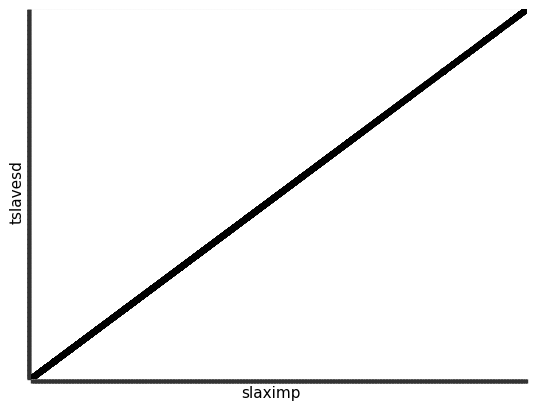

<ggplot: (-9223372029299026067)>

In [8]:
# Visulize the association between slaximp and tslavesd
TAST['ncar13'] = pd.to_numeric(TAST['ncar13'])
p1 = p9.ggplot(TAST[['slaximp', 'tslavesd']].dropna())
p1 += p9.aes(x='slaximp', y='tslavesd')
p1 += p9.geom_point()
p1 += p9.theme(axis_text_x = p9.element_blank(), axis_text_y = p9.element_blank())
p1

As we can see, slaximp is imputed from tslavesd if tslavesd is not missing.

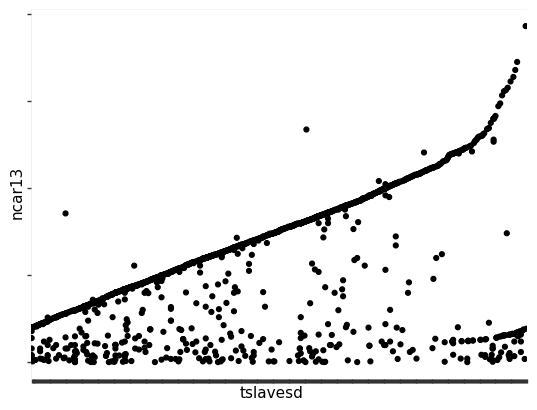

<ggplot: (-9223372029294797971)>

In [107]:
# Visulize the association between slaximp and ncar13
TAST['ncar13'] = pd.to_numeric(TAST['ncar13'])
p2 = p9.ggplot(TAST[['tslavesd', 'ncar13']].dropna())
p2 += p9.aes(x='tslavesd', y='ncar13')
p2 += p9.geom_point()
p2 += p9.theme(axis_text_x = p9.element_blank(), axis_text_y = p9.element_blank())
p2

For a large proportion of ncar13, it is closely connected with tslavesd. I don't trust the answer from 2.2 since we don't know if slaximp is missing randomly.

**Exercise 3.** Hot-deck imputation replaces missing data with similar entries.  We will use a stochastic hot-deck imputation method, which replaces the number captured into slavery (tslavesd) with a random voyage from the same decade.  (If there is only one voyage in that decade then ignore that record.)  Construct a function that performs this random imputation method, and outputs a Series with this new imputed variable.  Calculate the total imputed tslavesd variable 100 times by performing this random imputation method 100 times.  Report the standard error, which is the standard deviation of the total imputed, along with the mean of the 100 trials.

In [114]:
# Hot-deck imputation
def hot_deck(data):
    '''
    Using a stochastic hot-deck imputation method replaces the number captured into slavery (tslavesd) 
    with a random voyage from the same decade. 
    If there is only one voyage in that decade then ignore that record.
    '''
    data['decade'] = data['yearam'] // 10
    data['tslavesd'] = data['tslavesd'].astype(float)
    data_group = data.groupby('decade')
    tslavesd = np.array(data['tslavesd'])
    for decade, a in data_group:
        choose = a.loc[a['tslavesd'].notna(), 'tslavesd']
        if len(choose.index) <= 1:
            continue
        else:
            for i in a.index[a['tslavesd'].isna()]:
                tslavesd[i] = np.random.choice(choose)
    return tslavesd

    
# Get year and tslavesd from original dataset
TAST_new = TAST[['yearam', 'tslavesd']].copy()
# Performing this random imputation method 100 times
matrix = np.zeros([len(TAST_new.index), 100])
for i in range(100):
    matrix[:, i] = hot_deck(TAST_new)
Output = pd.DataFrame({'mean': np.mean(matrix, axis = 1), 'standard error': np.std(matrix, axis = 1)})
Output

,mean,standard error
0,389.02,166.568243
1,371.05,177.747651
2,417.15,168.337065
3,373.42,158.393888
4,384.82,161.764173
...,...,...
34936,379.36,226.634177
34937,533.18,281.527206
34938,524.14,318.013428
34939,562.74,310.508860


**Exercise 4.** The flag that the ships flew.

1. We want to understand the trends of the nationality of the slave ships (the flag that they flew under is in the national variable).  Subselect the values of `national` that have more than 100 voyages with that value.  
2. Create a DataFrame that filters out the voyages where `national` does not have one of these values.  You should be retaining voyages with only these most common values.
3. Create a variable, `flag`, that is a string of easily readable names for these values by looking them up in the pdf codebook.
4. Using Plotnine, plot the counts of the voyages by flag as a function of voyage year.  Think about how best to display the count of a voyage by year and then how should you be including the flag variable.
5. In this plot, what are the geometric elements and aesthetic mappings?  What other components of the grammar of graphics are you using?
6. Do you observe any abrupt changes in the patterns of these counts for a given flag?  Investigate the cause for this change (using Google, etc.).

In [10]:
# Task 1: Subselect national variable
Series_national = TAST.groupby('national').count()['voyageid']
Index = Series_national.index[Series_national > 100]
Index = Index.astype(float).tolist()
Index

[1.0, 10.0, 11.0, 4.0, 5.0, 7.0, 8.0, 9.0]

As we see, the values of national that have more than 100 voyages are 1, 4, 5, 7, 8, 9, 10, 11

In [11]:
# Task 2: Create a new DataFrame with nationals that have more than 100 voyages
TAST_1 = TAST
TAST_1['national'] = TAST_1['national'].astype(float)
TAST_1 = TAST_1.query('national in [1, 4, 5, 7, 8, 9, 10, 11]')

In [72]:
# Task 3: Create a new variable flag
TAST_1.loc[TAST_1['national'] == 1, 'flag'] = 'Spain' 
TAST_1.loc[TAST_1['national'] == 4, 'flag'] = 'Portugal'
TAST_1.loc[TAST_1['national'] == 5, 'flag'] = 'Brazil'
TAST_1.loc[TAST_1['national'] == 7, 'flag'] = 'Great Britain'
TAST_1.loc[TAST_1['national'] == 8, 'flag'] = 'Netherlands'
TAST_1.loc[TAST_1['national'] == 9, 'flag'] = 'U.S.A.'
TAST_1.loc[TAST_1['national'] == 10, 'flag'] = 'France'
TAST_1.loc[TAST_1['national'] == 11, 'flag'] = 'Denmark'

/Users/shayne/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


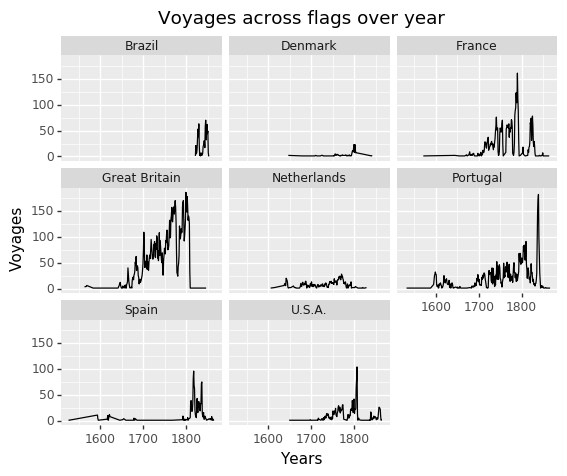

<ggplot: (7564857187)>

In [37]:
# Task 4: Plot the counts of the voyages by flag as a function of voyage year.
voyage = TAST_1.groupby(['flag', 'yearam']).count()['voyageid']
voyage_year = pd.concat([voyage.to_frame().reset_index(drop=True), voyage.index.to_frame().reset_index(drop=True)], axis = 1)
gg = p9.ggplot(voyage_year) + p9.aes(x = 'yearam', y = 'voyageid') + p9.facet_wrap('~flag')\
+ p9.geom_line() + p9.labels.ggtitle('Voyages across flags over year') + p9.labels.ylab('Voyages')\
+ p9.labels.xlab('Years')
gg

#### Task 5:
1. Geometrix elements are lines connecting voyages for each year within eight countries.
2. Aesthetic mappings are year maps to x-aixs, voyages maps to y-axis.
3. Other grammer of graphics: facet_wrap clause seperates eight countries apart; There are also clauses for changing label names.

#### Task 6: 
1. For Brazil, Spain and Portugal, there were huge declines around the mid-nineteenth century since Portugal and Spain continued to export Africans on a large scale to Brazil and Cuba until the mid-nineteenth century.
2. There was a decline around 19 century since France took action to stop its slave trade in 1815.
3. Great Britain had two sharp decline around 1780s and 1830s since large popular protest movement against slavery that emerged across Britain between the 1780s and 1830s.
4. Slavery trade in U.S.A ended around early 19 century

Source: https://www.open.edu/openlearn/history-the-arts/history/the-rise-and-fall-the-slave-trade

**Exercise 5.** Looking at some of these ships.

1. Search for the slave ship mentioned in the following wikipedia article: https://en.wikipedia.org/wiki/Brookes_(ship) Hint: Look at all records of ships with 'Brook' in the name and try to match the characteristics to those described.  How many voyages for this ship are in the data (try to exclude ships with the same name)?
2. Create a variable that is True if there was a resistance (like a slave revolt) on the ship.  Plot the density of ships as a function of year with and without revolts and compare these distributions.
3. The movie Amistad was based on a real slave ship and slave uprising.  Read about it here: https://en.wikipedia.org/wiki/La_Amistad  Try to find this ship by searching for it by name and also searching for ships in the same 10 year period as this event with a slave resistance.  If you think you found it describe it, otherwise describe the events of another voyage that you did find.  

In [159]:
# Task 1: Search for ships with 'Brook' in the name
for name in TAST['shipname'].unique():
    if isinstance(name, str):
        if re.match('Brook', name):
            print(name)
num1, num2, num3 = 0, 0, 0
for name in TAST['shipname']:
    if name == 'Brooke':
        num1 += 1
    elif name == 'Brooks':
        num2 += 1
    elif name == 'Brooks (a) Brookes':
        num3 += 1
dict_ship = {'Brooke': num1, 'Brooks': num2, 'Brooks (a) Brookes': num3}
dict_ship

Brooke
Brooks
Brooks (a) Brookes


{'Brooke': 12, 'Brooks': 12, 'Brooks (a) Brookes': 1}

As we can see, there are three 12 voyages for 'Brooke' ship, 12 voyages for 'Brooks' ship and 1 voyage for 'Brooks (a) Brookes' ship.

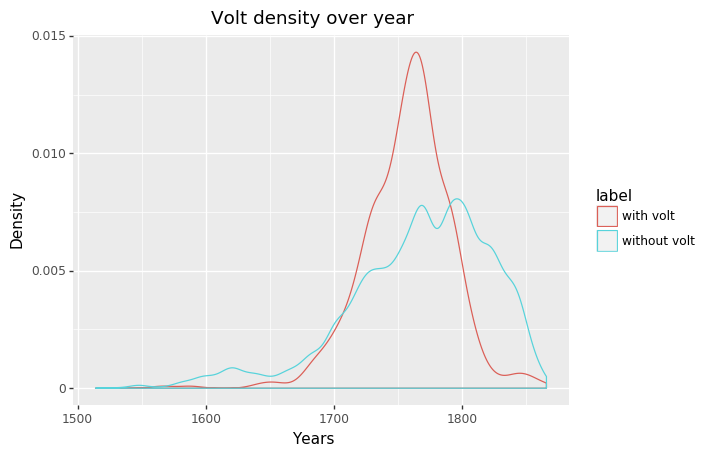

<ggplot: (7558632228)>

In [55]:
# Task 2: Plot the density of ships as a function of year with and without revolts
TAST['resistance'] = TAST['resistance'].astype(float)
TAST.loc[TAST['resistance'] > 0, 'Resistance'] = True
TAST.loc[TAST['Resistance'] == True, 'label'] = 'with volt'
TAST.loc[TAST['Resistance'] != True, 'label'] = 'without volt'
gg1 = p9.ggplot(TAST) + p9.aes(x = 'yearam', color = 'label')\
+ p9.geom_density() + p9.labels.ggtitle('Volt density over year') + p9.labels.xlab('Years') + p9.labels.ylab('Density')
gg1

As we can see from the plot, most volts took place from 17 to 18 century since most voyages took place in this period as well. We find a higher percentage of volts in ships around 1700 to 1800 while a lower percentage in volts after 1800 compared to the density lines of 'without volt'.

In [160]:
# Task 3: 
for name in TAST['shipname'].unique():
    if isinstance(name, str):
        if re.match('Brook', name):
            print(name)

**Exercise 6.** Other patterns.

1. The arrival and departure locations are quite detailed.  Look in the appendix of the codebook for the location codes.  Make a coarser version of both arrival and departure port variables (select just the last departure and first arrival) so that for example,  
```
30000 Caribbean 36100 Martinique 36101 Fort-Royale
```
is just encoded as '3' or Caribbean.
2. Plot the trend of voyages as a function of arrival location.  What trends do you see?
3. Do the same for departure location.
4. Plot the ratio of captives that are men as a function of year.  Include a smoother to describe the over all trend.  Also include in the plot another possible confounding variable.
5. Describe the geoms, aesthetic mappings, and other aspects of the plot.

In [127]:
# Task 1: Make a coarser version of both arrival and departure port variables
TAST['departure_number'] = TAST['ptdepimp'].astype(float)//10000
TAST['arrival_number'] = TAST['sla1port'].astype(float)//10000
TAST.departure_number.fillna(9, inplace = True)
TAST.arrival_number.fillna(9, inplace = True)
location_dict = {1:'Europe', 2:'Mainland North America', 3:'Caribbean', 4:'Spanish Mainland America',
                 5:'Brazil', 6:'Africa', 8:'Other', 9: 'Missing'}
TAST['departure'] = [location_dict[i] for i in TAST.departure_id]
TAST['arrival'] = [location_dict[i] for i in TAST.arrival_id]

,voyageid,evgreen,shipname,national,natinimp,placcons,yrcons,placreg,yrreg,rig,...,sourceq,sourcer,Resistance,label,arrival,departure,departure_id,arrival_id,departure_number,arrival_number
0,1,1,Pastora de Lima,4.0,6,NaN,NaN,NaN,NaN,40,...,NaN,NaN,NaN,without volt,Brazil,Brazil,5.0,5.0,5.0,5.0
1,2,1,Tibério,NaN,6,NaN,NaN,NaN,NaN,40,...,NaN,NaN,NaN,without volt,Brazil,Brazil,5.0,5.0,5.0,5.0
2,3,1,Paquete Real,NaN,6,NaN,NaN,NaN,NaN,40,...,NaN,NaN,NaN,without volt,Brazil,Brazil,5.0,5.0,5.0,5.0
3,4,1,Bom Caminho,NaN,6,NaN,NaN,NaN,NaN,40,...,NaN,NaN,NaN,without volt,Brazil,Brazil,5.0,5.0,5.0,5.0
4,5,1,Benigretta,NaN,6,NaN,NaN,NaN,NaN,25,...,NaN,NaN,NaN,without volt,Brazil,Brazil,5.0,5.0,5.0,5.0


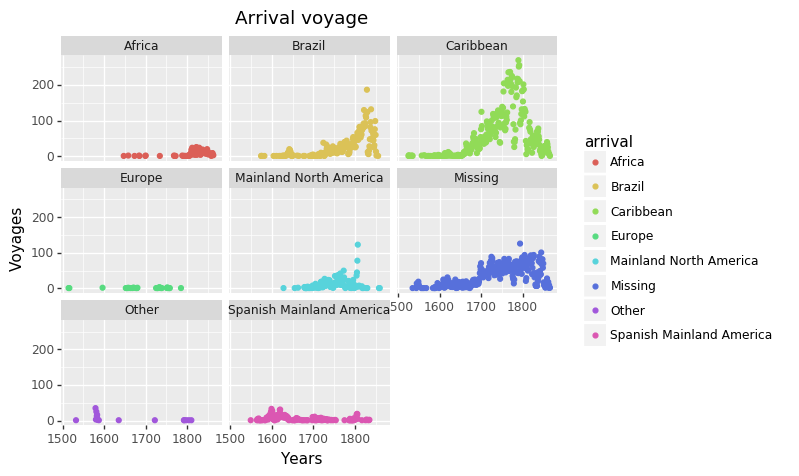

<ggplot: (7566146508)>

In [139]:
# Task 2: Plot the trend of voyages
Trend = TAST.groupby(['arrival','yearam'])['voyageid'].count().reset_index(name='voyage_count')
gg3 = p9.ggplot(Trend) + p9.facet_wrap('~arrival') + p9.aes(x='yearam', y='voyage_count', color = 'arrival')\
+ p9.geom_point() + p9.labels.ggtitle('Arrival voyage') + p9.labels.xlab('Years') + p9.labels.ylab('Voyages')
gg3

As we see from the plot, the arrival positions switch from Spanish Mainland America(16, 17 centuries) to Afirca, Brazil and Caribbean(18 century). Most voyage ends in Caribbean and Brazil and there are few voyages arrived Europe.

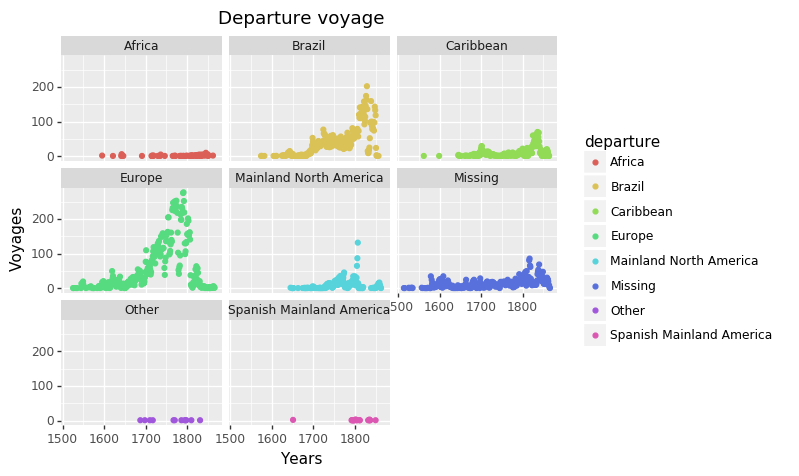

<ggplot: (-9223372029288051417)>

In [140]:
# Task 3: Do the same for departure location.
Trend = TAST.groupby(['departure','yearam'])['voyageid'].count().reset_index(name='voyage_count')
gg4 = p9.ggplot(Trend) + p9.facet_wrap('~departure') + p9.aes(x='yearam', y='voyage_count', color = 'departure')\
+ p9.geom_point() + p9.labels.ggtitle('Departure voyage') + p9.labels.xlab('Years') + p9.labels.ylab('Voyages')
gg4

As we see from the plot, the most departure positions took place in Europe and Brazil, Caribbean switched from a popular arrival position to a rare departure position which means most voyages began in somewhere else and ended in Caribbean.

In [147]:
TAST['menrat7'] = TAST['menrat7'].astype(float)

/Users/shayne/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/Users/shayne/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/Users/shayne/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 31567 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


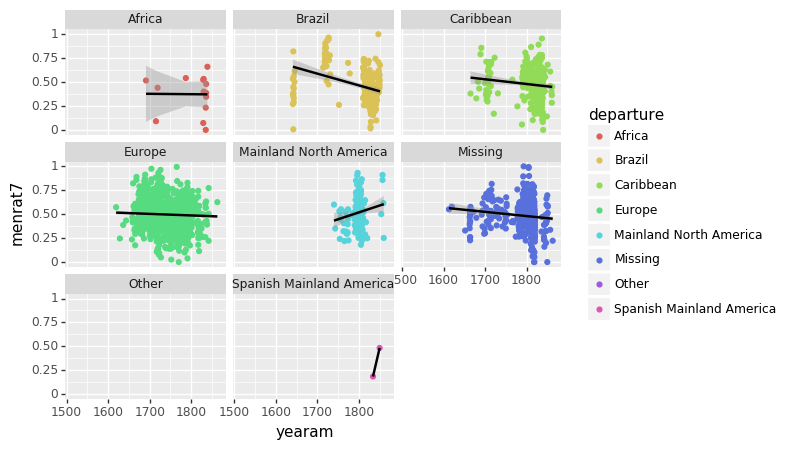

<ggplot: (7588574384)>

In [151]:
# Task 4: Plot the ratio of captives that are men as a function of year with departure as the confounding variable
gg5 = p9.ggplot(TAST) + p9.aes(x='yearam',y='menrat7', color='departure') + p9.geom_point()\
+  p9.stat_smooth(mapping=p9.aes(x='yearam', y='menrat7'), method='lm',se=True, color = 'black',inherit_aes=False)\
+ p9.facet_wrap('~departure')
gg5

As we can see, ratio of captives that are man kept unchanged in Africa, Europe. While in Mainland North America and Spanish Mainland America, the ratio rised over time and in Brazil and Caribbean, the ratio declined over time. Most slaveries from Africa and Spanish Mainland America are women(with ratio of captives that are man lower than 0.5). 

#### Task 5: Describe the geoms, aesthetic mappings, and other aspects of the plot.
1. Geoms: geom_point draws the scatter plot of the variables
2. Aesthetic mappings: all three plots map year to the x-axis. The first and second plot maps total voyage numbers to the y-axis while the thrid plot maps menrat7(ratio of captives that are man) to the y-axis.
3. Other aspects of the plot: facet_wrap clause seperates eight countries apart.